In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('NID_data.csv')
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


# A1

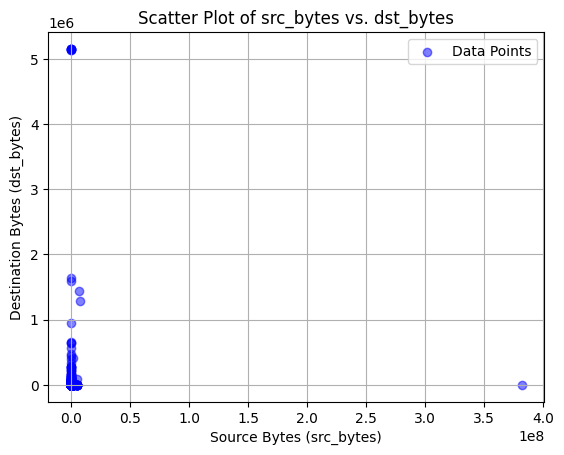

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

feature_A = data['src_bytes']
feature_B = data['dst_bytes']

plt.scatter(feature_A, feature_B, alpha=0.5, c='b', label='Data Points')
plt.xlabel("Source Bytes (src_bytes)")
plt.ylabel("Destination Bytes (dst_bytes)")
plt.title("Scatter Plot of src_bytes vs. dst_bytes")

plt.legend()
plt.grid(True)
plt.show()

# A2

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['count']]  
y = data['dst_host_count']   
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
 
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 7584.0959


# A3

Linear regression is established the relationship between a dependent variable (the target) and one or more independent variables (features or predictors). Various parameters and attributes are associated with linear regression models, and they can be found in libraries like scikit-learn in Python. Here is a breakdown of the key parameters and attributes for a simple linear regression model:

Parameters:

1. fit_intercept(boolean, default=True): 
	This parameter determines whether to include the intercept term in the linear regression model. Setting it to False results in a model without an intercept.

2. normalize (boolean, default=False): 
	When set to True, this parameter scales the features before fitting the model. It is relevant only when fit_intercept is True.

3. copy_X (boolean, default=True): 
	If set to True, it creates a copy of the input features. Typically, it is set to True to avoid altering the original data.

Attributes:

1. coef_: 
	This attribute provides an array of coefficients (slopes) associated with each feature. In the case of a simple linear regression model, there is only one coefficient.

2. intercept_: 
	It offers the intercept term of the linear regression model. When fit_intercept is set to False, this value is zero.

3. rank_: 
	This attribute indicates the rank of the feature matrix, which is useful for detecting multicollinearity issues.

4. singular_: 
	It is an array containing the singular values of the feature matrix, aiding in assessing the problem's condition.

5. n_features_in_: 
	This attribute reveals the number of features used during the fitting process.

6. n_targets_: 
	It specifies the number of target variables, typically 1 for simple linear regression.

7. residues_: 
	This attribute provides the sum of squared residuals, which is the sum of the squared differences between the observed and predicted values.

8. coef_path_: 
	For ridge and lasso regression, this attribute returns the coefficients along the regularization path.

9. n_iter_: 
	Some optimization algorithms used in linear regression have this attribute, indicating the number of iterations required for convergence.

10. dual_coef_: 
	This attribute is utilized in support vector regression (SVR) and contains the dual coefficients.

# A4

In [5]:
features = data.loc[: , 'duration' : 'dst_host_srv_rerror_rate']
labels = data.loc[: , ['class']]

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score as acs

X_train, X_test, y_train, y_test = tts(features, labels, test_size=0.2, random_state=42)

categ_var_train = X_train.select_dtypes(include=['object'])
categ_var_test = X_test.select_dtypes(include=['object'])

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 

for col in categ_var_train:
    X_train[col] = label_encoder.fit_transform(X_train[col])

for col in categ_var_test:
    X_test[col] = label_encoder.fit_transform(X_test[col])

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

C:\Users\roosh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on the test set: 0.8964080174637825


# A5

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('NID_data.csv')

X = data[['duration', 'src_bytes']]  
y = data['dst_bytes']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions_tree = tree_model.predict(X_test)
tree_mae = mean_absolute_error(y_test, tree_predictions_tree)
tree_mse = mean_squared_error(y_test, tree_predictions_tree)

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)
knn_predictions_knn = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_predictions_knn)
knn_mse = mean_squared_error(y_test, knn_predictions_knn)

print("Regression Tree MAE:", tree_mae)
print("Regression Tree MSE:", tree_mse)
print("k-NN Regressor MAE:", knn_mae)
print("k-NN Regressor MSE:", knn_mse)


Regression Tree MAE: 2972.9210043335943
Regression Tree MSE: 1284065905.0243938
k-NN Regressor MAE: 4599.733359793609
k-NN Regressor MSE: 8592587317.474293
